<a href="https://colab.research.google.com/github/MatheusHavoc/Roof_Imoveis/blob/main/roof_im_veis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County - Condado de King - Washington

O Condado de King é um dos 39 condados do estado americano de 
Washington. A sede e cidade mais populosa do condado é Seattle.
 Foi fundado em 1852. Com mais de 2,2 milhões de habitantes, de acordo 
com o censo nacional de 2020, é o condado mais populoso do estado e o 12º 
mais populoso do país. Wikipédia
O Dataset apresenta a venda de imóveis e suas características na região 
de Maio de 2014 à Maio de 2015. Tem um total de 21613 registros com um total 
de 21 atributos.



A empresa te contratou pois quer saber qual seria os 5 imóveis que 
ela deveria investir e o porquê e quais 5 você não recomendaria o 
investimento de jeito nenhum.

# conexão driver

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# importando as bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
#caminho do arquivo 
df = pd.read_csv('/content/drive/MyDrive/arquivos análise /kc_house_data.csv')

#A coluna data estão fora do padrão

In [3]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


# data esta declarada no formato de object

In [4]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

#Arrumando coluna data  

In [5]:
data = df['date'].astype('datetime64')
df['date'] = data 

#Renomear as colunas para melhor entendimento 

In [6]:
df_Novo = df.rename(columns ={
"date"      :"Data_Venda",
"price"     :"Preco_Venda",
"bedrooms"  :"Num_Quartos",
"bathrooms" :"Num_Banheiros",
"sqft_living"  :"Tam_Areahab_ft",
"sqft_lot"  :"Tam_Terreno_ft",
"floors"    :"Num_Andares",
"waterfront" : "Indica_BeiraMar",

"view" :"Grau_Beleza",#(0 a 4)
"condition" :"Condiçao_casa",# (1 a 5)
"grade" :"Qualidade_Material",
"sqft_above": "Area_acima_soloFT",
"sqft_basement" : "Area_abaixo_soloFT",
"yr_built": "Ano de construção",
"yr_renovated" :"Ano_restauracao", # caso o contrário 0
"zipcode": "CEP",
"lat" : "Latitude",
"long" :"Longitude",
"sqft_living15" : "Med_Area_hab_prox", 
"sqft_lot15" : "Med_Area_hab_lote"})

#Parece não haver colunas null / Dados já estão relativamente limpo e organizado.

In [7]:
df_Novo.isna().sum()

id                    0
Data_Venda            0
Preco_Venda           0
Num_Quartos           0
Num_Banheiros         0
Tam_Areahab_ft        0
Tam_Terreno_ft        0
Num_Andares           0
Indica_BeiraMar       0
Grau_Beleza           0
Condiçao_casa         0
Qualidade_Material    0
Area_acima_soloFT     0
Area_abaixo_soloFT    0
Ano de construção     0
Ano_restauracao       0
CEP                   0
Latitude              0
Longitude             0
Med_Area_hab_prox     0
Med_Area_hab_lote     0
dtype: int64

#Observando distribuição Preco_Venda

In [8]:
pd.DataFrame(df_Novo['Preco_Venda'].describe())

,Preco_Venda
count,2.161300e+04
mean,5.400881e+05
std,3.671272e+05
min,7.500000e+04
25%,3.219500e+05
50%,4.500000e+05
75%,6.450000e+05
max,7.700000e+06


#Comecei pela coluna preço de venda, queria ver distribuição de valores com Teorema do limite central. observei um desvio de padrão elevado.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


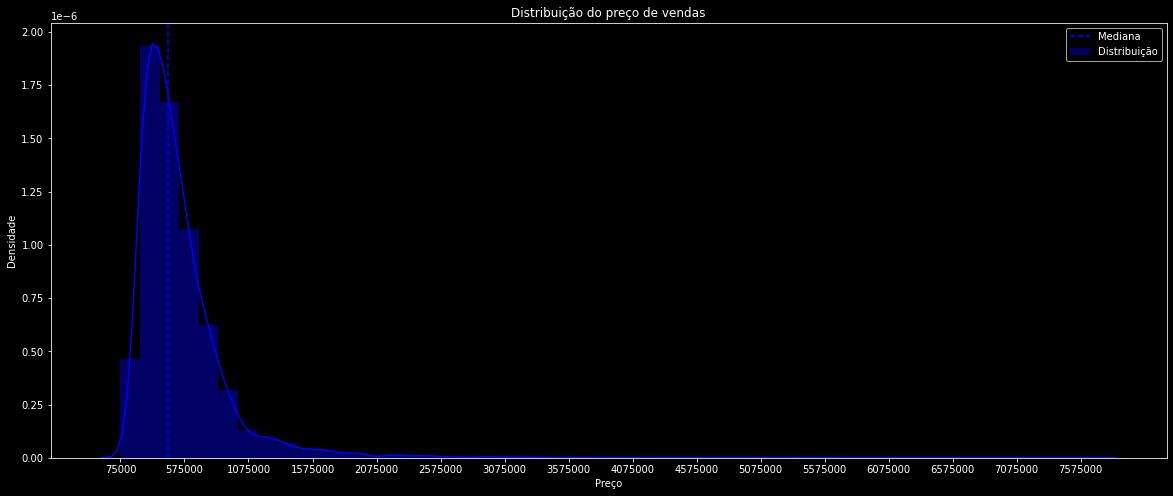

In [9]:
med_price = df_Novo['Preco_Venda'].median();

plt.figure(figsize=[20, 8]);
sns.distplot(df_Novo['Preco_Venda'], color = 'b', label = 'Distribuição');
plt.axvline(med_price, color='b', linestyle='dashed', label='Mediana');

plt.ticklabel_format(style='plain', axis='x');

plt.title('Distribuição do preço de vendas');
plt.xlabel('Preço');
plt.ylabel('Densidade');

plt.xticks(np.arange(df_Novo['Preco_Venda'].min(), df_Novo['Preco_Venda'].max(), step=500000));

plt.legend();
plt.show();

#Logo após tentei entender melhor as colunas, para ver quais tinha relevância.

#**‘Condição casa’** parece não haver impacto significativa no preço, mas há muitos outliers, principalmente nos valores 3, 4 e 5.

#**qualidade dos materiais** afeta diretamente preço do imóveis 


---



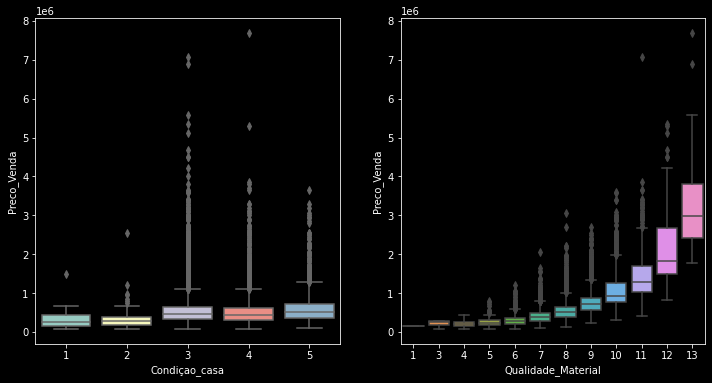

In [10]:
plt.figure(figsize=[12, 6])

plt.subplot(121)
sns.boxplot(x='Condiçao_casa', y='Preco_Venda', data=df_Novo);

plt.subplot(122)
sns.boxplot(x='Qualidade_Material', y='Preco_Venda', data=df_Novo)

plt.show()

#Fazendo uma Correlação entre colunas:

In [11]:
corelacao = df_Novo._get_numeric_data()
corelacao.drop('id', 1, inplace=True)

new_correlations = corelacao.corr()
highly_correlated_features = new_correlations[new_correlations > 0.75]
highly_correlated_features.fillna('-')

<ipython-input-11-173c9d069395>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  corelacao.drop('id', 1, inplace=True)


,Preco_Venda,Num_Quartos,Num_Banheiros,Tam_Areahab_ft,Tam_Terreno_ft,Num_Andares,Indica_BeiraMar,Grau_Beleza,Condiçao_casa,Qualidade_Material,Area_acima_soloFT,Area_abaixo_soloFT,Ano de construção,Ano_restauracao,CEP,Latitude,Longitude,Med_Area_hab_prox,Med_Area_hab_lote
Preco_Venda,1.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
Num_Quartos,-,1.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
Num_Banheiros,-,-,1.0,0.754665,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
Tam_Areahab_ft,-,-,0.754665,1.0,-,-,-,-,-,0.762704,0.876597,-,-,-,-,-,-,0.75642,-
Tam_Terreno_ft,-,-,-,-,1.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-
Num_Andares,-,-,-,-,-,1.0,-,-,-,-,-,-,-,-,-,-,-,-,-
Indica_BeiraMar,-,-,-,-,-,-,1.0,-,-,-,-,-,-,-,-,-,-,-,-
Grau_Beleza,-,-,-,-,-,-,-,1.0,-,-,-,-,-,-,-,-,-,-,-
Condiçao_casa,-,-,-,-,-,-,-,-,1.0,-,-,-,-,-,-,-,-,-,-
Qualidade_Material,-,-,-,0.762704,-,-,-,-,-,1.0,0.755923,-,-,-,-,-,-,-,-


#Dar para perceber que temos várias colunas que não afeta o preço e ainda pode estar influenciado outras colunas, então irei analisar as colunas que possuem correlação maior que 0.5 e menor que -0.5, que influencia positivamente ou negativamente

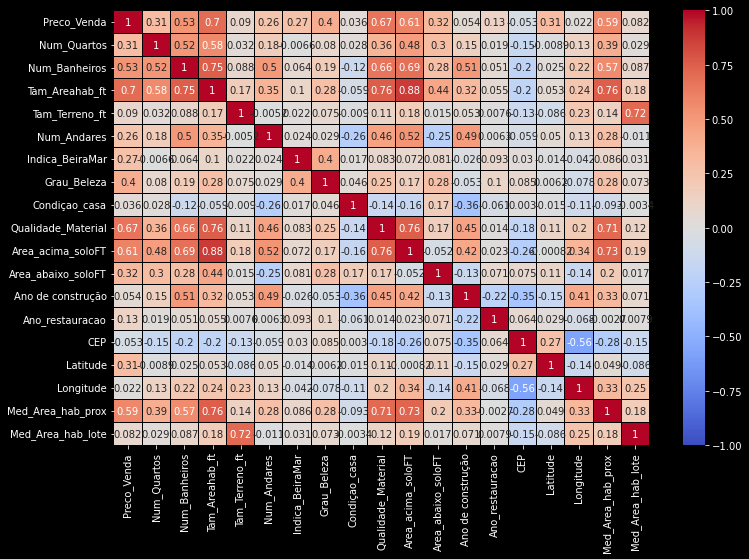

In [12]:
var_corr = corelacao.corr()

plt.figure(figsize = [12, 8])
sns.heatmap(var_corr, vmin=-1, vmax=1, linewidth=0.01, linecolor='black',annot=True, cmap='coolwarm')
plt.show()

In [13]:
var_corr['Preco_Venda'].sort_values(ascending=False).round(3)

Preco_Venda           1.000
Tam_Areahab_ft        0.702
Qualidade_Material    0.667
Area_acima_soloFT     0.606
Med_Area_hab_prox     0.585
Num_Banheiros         0.525
Grau_Beleza           0.397
Area_abaixo_soloFT    0.324
Num_Quartos           0.308
Latitude              0.307
Indica_BeiraMar       0.266
Num_Andares           0.257
Ano_restauracao       0.126
Tam_Terreno_ft        0.090
Med_Area_hab_lote     0.082
Ano de construção     0.054
Condiçao_casa         0.036
Longitude             0.022
CEP                  -0.053
Name: Preco_Venda, dtype: float64

#Essas são as principais colunas que tem influencia com valor dos imóveis: 

Num_Quartos : Número de quartos.

Num_Banheiros : Número de casas de banho.

Tam_Areahab_ft : Tamanho da área habitável em pés quadrados.

Qualidade_Material :  grau Classificação por qualidade de construção que se refere aos tipos de materiais utilizados e à qualidade de mão-de-obra. Edifícios de melhor qualidade (grau mais alto) custam mais para serem construídos por unidade de medida e exigem maior valor. 

Area_acima_soloFT : quadrados acima do solo

Med_Area_hab_prox : Tamanho médio do espaço interno da habitação para as 15 casas mais próximas, em pés quadrados.

Outras não influencia ou não tem significância para afetar no valor imóveis.


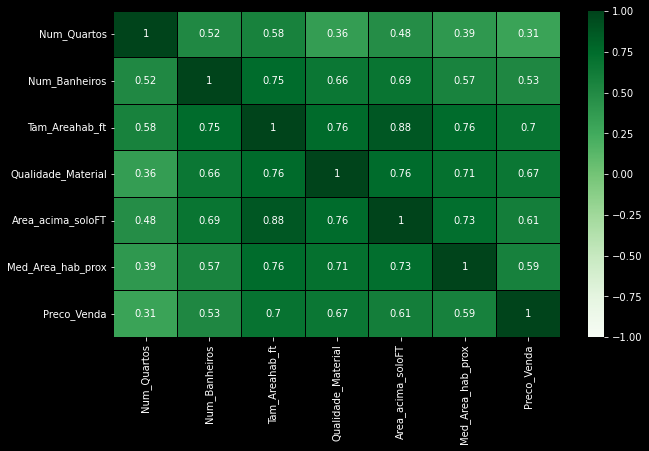

In [14]:
cols = df_Novo[['Num_Quartos', 'Num_Banheiros', 'Tam_Areahab_ft', 'Qualidade_Material', 'Area_acima_soloFT',
                         'Med_Area_hab_prox', 'Preco_Venda']]
most_corr_var = cols.corr()

plt.figure(figsize=[10, 6])
sns.heatmap(data=most_corr_var, vmin=-1, vmax=1, linewidth=0.01, linecolor='black', cmap='Greens', annot=True)

plt.show()

fazendo uma regressão linear conseguimos percebe melhor como cada variável se comporta em relação preço.

Valor imóveis sobre conforme a quantidade de 	quartos, porém acima de 5 quantos o valor começa cair.

Quantidades de banheiros também, até 4 banheiros completos ou incompleto, com pia ou sem vazo etc. porém acima de 5 valor começa dispersar.

Tamanho da área Habitável afeta diretamente valor imóveis. Porém tem dispersão a parti 6000,

Qualidade Material maior grau é 13 e afeta diretamente o preço de forma exponencialmente cresce, pico é 12 após isso começa dispersão.

Área acima do solo e área habitável prox., parece afetar, porém tem dispersão logo acima de 50000.


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

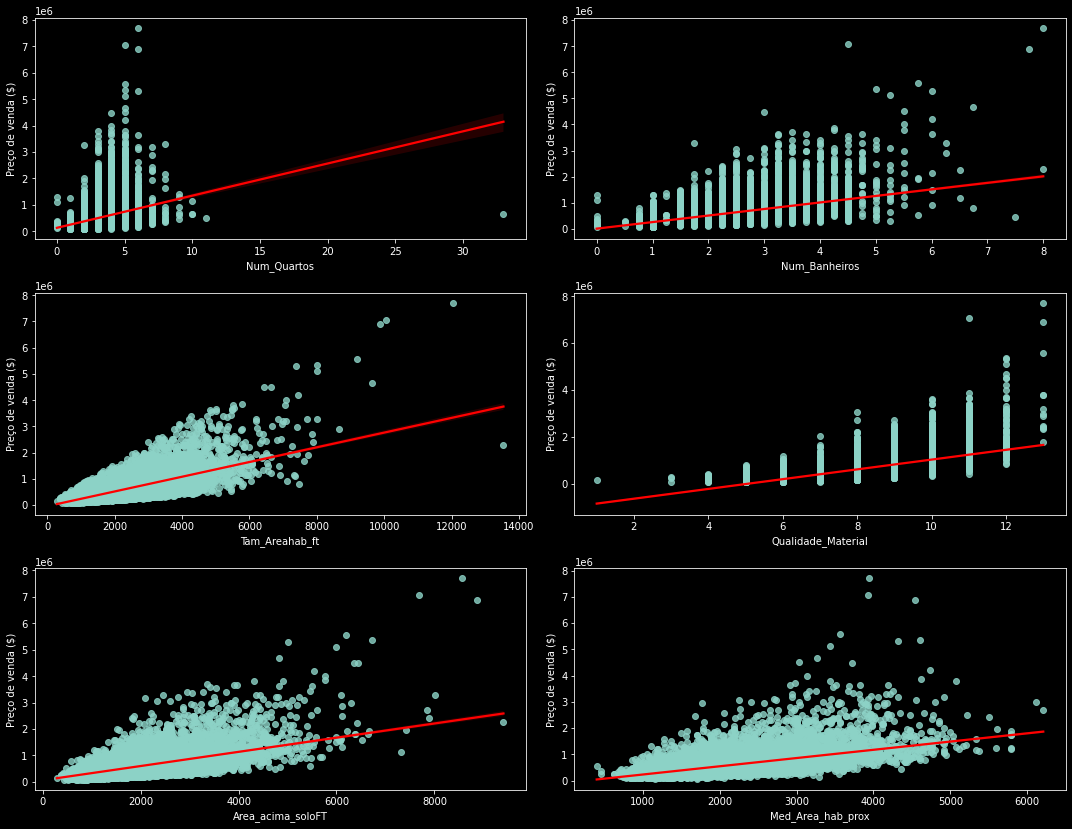

In [15]:
plt.figure(figsize=[15, 15])

i = 1

for col in cols:
    if col == 'Preco_Venda':
        continue
    plt.subplot(4, 2, i)
    sns.regplot(df_Novo[col], df_Novo['Preco_Venda'], line_kws={'color': 'r'})
    plt.xlabel(col)
    plt.ylabel('Preço de venda ($)')
    i+=1
    
plt.tight_layout();
plt.show();

# Agrupei os imóveis por décadas de construções para observar valores 

In [16]:

dates = pd.DataFrame(df_Novo['Ano de construção'], columns=['Ano de construção'])
bins = [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2015]
labels = ['1900 - 1910', '1911 - 1920', '1921 - 1930', '1931 - 1940', '1941 - 1950', '1951 - 1960', '1961 - 1970', '1971 - 1980',
         '1981 - 1990', '1991 - 2000', '2001 - 2010', '2011 - 2015']
df_Novo['Decada'] = pd.cut(dates['Ano de construção'], bins, labels = labels, include_lowest = True)
df_Novo.sample(5)

,id,Data_Venda,Preco_Venda,Num_Quartos,Num_Banheiros,Tam_Areahab_ft,Tam_Terreno_ft,Num_Andares,Indica_BeiraMar,Grau_Beleza,...,Area_acima_soloFT,Area_abaixo_soloFT,Ano de construção,Ano_restauracao,CEP,Latitude,Longitude,Med_Area_hab_prox,Med_Area_hab_lote,Decada
1936,1246700152,2014-07-21,335000.0,3,1.50,1560,9600,1.0,0,0,...,1560,0,1961,0,98033,47.6918,-122.163,1520,10000,1961 - 1970
7693,3579700100,2014-05-27,389000.0,5,2.00,2330,10750,1.0,0,0,...,1190,1140,1962,0,98028,47.7325,-122.245,1830,10180,1961 - 1970
19589,4338800600,2014-06-09,235000.0,3,1.00,1590,13000,1.5,0,0,...,1590,0,1944,0,98166,47.4789,-122.346,1460,8400,1941 - 1950
5000,3023049215,2014-07-02,519000.0,5,2.25,2570,13054,1.0,0,1,...,1470,1100,1950,1992,98166,47.4487,-122.352,2570,19807,1941 - 1950
14655,1257201530,2014-05-13,620000.0,3,1.00,1710,4050,1.5,0,0,...,1710,0,1909,0,98103,47.6732,-122.331,1790,4896,1900 - 1910


#1900 a 1940 manteve sempre mesmos patamar de valor, porém tem queda valor a partir 1941 – 1970, e a parti 1971 valor começa subir.

Pesquisando e tentando entender essa queda brusca nos valores:

O bombardeio de Pearl Harbor pelo Japão em dezembro de 1941 desencadeou uma série de eventos e decisões que levaram ao que foi chamado de a pior violação dos direitos constitucionais da história americana: a expulsão e prisão de 110.000 pessoas de ascendência japonesa do oeste dos EUA. Costa. Dois terços deles eram cidadãos americanos.

Provavelmente esse evento histórico afetou imóveis Condado de King


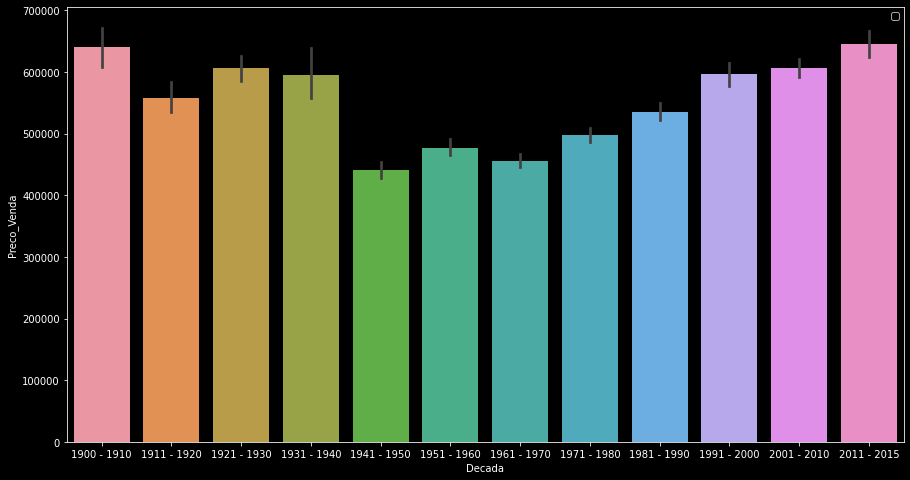

In [17]:
plt.figure(figsize=[15,8])
sns.barplot(x=df_Novo['Decada'], y=df_Novo['Preco_Venda'])
plt.legend()
plt.show()

# separado em grupos de cada década 

In [18]:

prices = pd.DataFrame(df_Novo['Preco_Venda'], columns=['Preco_Venda'])
bins = [0, 250000, 500000, 1000000, 8000000]
labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4']
df_Novo['preco_group'] = pd.cut(prices['Preco_Venda'], bins, labels = labels, include_lowest = True)

# agrupar por id do imóveis e pegar ultimo valor de venda

In [19]:
df_lucro = df_Novo.groupby('id').agg({'Data_Venda': 'max', 'Preco_Venda': 'max'})
df_lucro = df_lucro.rename(columns = {'Data_Venda':'ultimaVenda','Preco_Venda':'SomaTotal'})  
df_lucro

,ultimaVenda,SomaTotal
id,,
1000102,2015-04-22,300000.0
1200019,2014-05-08,647500.0
1200021,2014-08-11,400000.0
2800031,2015-04-01,235000.0
3600057,2015-03-19,402500.0
...,...,...
9842300095,2014-07-25,365000.0
9842300485,2015-03-11,380000.0
9842300540,2014-06-24,339000.0


# excluir imoveis duplicado que foram vendido mais de uma vez, para poder fazer marge (junta df acima com atual )

In [20]:
df = df_Novo.sort_values('id', ascending=False)
df = df_Novo.drop_duplicates(subset='id', keep='first')

#juntando dois dataset 

In [21]:
df_nv = df_Novo.merge(df_lucro, on="id", how="outer")

#criando função,  caso valor ultima venda seja inferior a primeira, apenas subtraia e add a uma nova coluna ,para saber valor desvalorização.

#senao subtraia valor,  divir pela primeira venda e multiplicar por 100, agora tenho quanto % valor imóveis se valorizou em comparação primeira venda.

#caso na coluna estaja com 0 significa que imóvel não teve venda.


In [31]:
if 'SomaTotal' < 'Preco_Venda' in df_nv.columns:
    df_nv['lucro_porcentagem'] = df_nv['SomaTotal'] - df_nv['Preco_Venda']
    df_nv['lucro_porcentagem'] = df_nv['lucro_porcentagem'] / df_nv['Preco_Venda']
    df_nv['lucro_porcentagem'] = df_nv['lucro_porcentagem'] *100
else :
    df_nv['lucro_porcentagem'] = df_nv['SomaTotal'] - df_nv['Preco_Venda'] 
    df_nv['lucro_porcentagem'] = df_nv['lucro_porcentagem'] / df_nv['Preco_Venda']
    df_nv['lucro_porcentagem'] = df_nv['lucro_porcentagem'] *100

pd.options.display.float_format = '{:.2f}'.format
porcentagem = df_nv.groupby(['lucro_porcentagem']).size()
porcentagem

lucro_porcentagem
0.00      21439
0.89          1
0.93          1
0.98          1
1.04          1
          ...  
168.17        1
176.47        1
196.97        1
230.83        1
321.80        1
Length: 174, dtype: int64

#Pegando os top 5 imóveis mais valorizados

168%     
176%     
196%    
230%        
321%

#E alguns imóveis sem venda total de : 21439

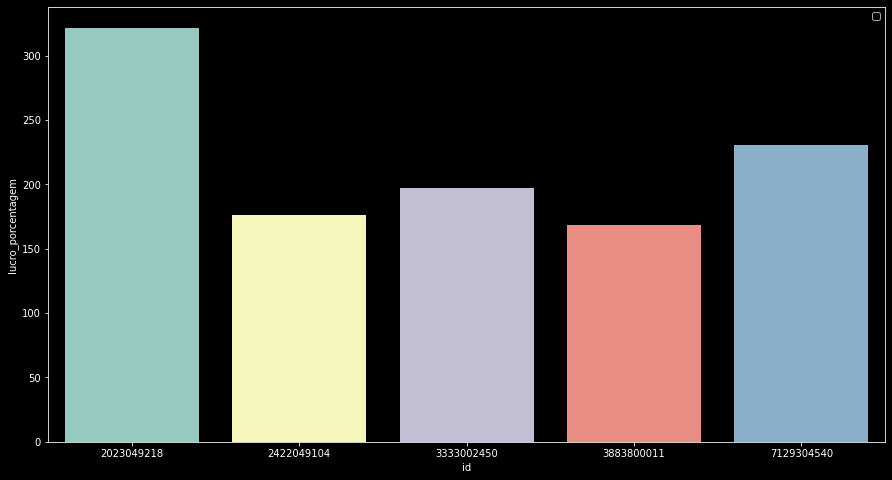

In [23]:
df_top = df_nv.sort_values('lucro_porcentagem', ascending = False).head(5)
plt.figure(figsize=[15,8])
sns.barplot(x=df_top['id'], y=df_top['lucro_porcentagem'])
plt.legend()
plt.show()

#vamos validar se esses imóveis são autêntico, pelo valor e características parece corresponde nada fora do padrão.

In [24]:
df_top

,id,Data_Venda,Preco_Venda,Num_Quartos,Num_Banheiros,Tam_Areahab_ft,Tam_Terreno_ft,Num_Andares,Indica_BeiraMar,Grau_Beleza,...,CEP,Latitude,Longitude,Med_Area_hab_prox,Med_Area_hab_lote,Decada,preco_group,ultimaVenda,SomaTotal,lucro_porcentagem
13628,2023049218,2014-07-16,105500.00,2,1.00,930,7740,1.00,0,0,...,98148,47.46,-122.32,1620,8584,1931 - 1940,Group 1,2015-03-16,445000.00,321.80
15810,7129304540,2014-12-20,133000.00,5,2.00,1430,5600,1.50,0,0,...,98118,47.52,-122.27,1860,5980,1941 - 1950,Group 1,2015-05-14,440000.00,230.83
14366,3333002450,2014-07-08,165000.00,1,1.00,850,8050,1.00,0,0,...,98118,47.54,-122.29,1590,5180,1900 - 1910,Group 1,2015-01-22,490000.00,196.97
10253,2422049104,2014-09-15,85000.00,2,1.00,830,9000,1.00,0,0,...,98032,47.38,-122.24,1160,7680,1931 - 1940,Group 1,2014-12-30,235000.00,176.47
8274,3883800011,2014-11-05,82000.00,3,1.00,860,10426,1.00,0,0,...,98146,47.50,-122.34,1140,11250,1951 - 1960,Group 1,2015-04-08,219900.00,168.17


# Minhas não recomendações por ter menores retornos 

In [25]:
menor_retorno = df_nv[(df_nv.lucro_porcentagem > 0)]

menor_retorno = menor_retorno.sort_values(by=['lucro_porcentagem'], ascending=True).head(5)

menor_retorno[['id','Preco_Venda','lucro_porcentagem']] # menor retorno 

,id,Preco_Venda,lucro_porcentagem
6371,9222400605,842500.00,0.89
11362,7701960990,862000.00,0.93
15278,2619920170,765000.00,0.98
7846,4139420590,1200000.00,1.04
1464,3630120700,757000.00,1.06


# Minhas recomendações por ter maiores retornos 

In [26]:
Melhores_retorno = df_nv.sort_values(by=['lucro_porcentagem'], ascending=False).head(5)

Melhores_retorno[['id','Preco_Venda','lucro_porcentagem']] # melhores retorno 

,id,Preco_Venda,lucro_porcentagem
13628,2023049218,105500.00,321.80
15810,7129304540,133000.00,230.83
14366,3333002450,165000.00,196.97
10253,2422049104,85000.00,176.47
8274,3883800011,82000.00,168.17


#Minhas recomendações por ter as melhores características, e tende a se valorizar.

Esteja no grupo: 2 Década

Quantidade de quartos: 4

Área habitacional: até 60000

Quantidade de banheiros: 3

Área acima do solo: até 60000

Qualidade dos materiais: 7

Número de andares: 1 ou 2


In [27]:
opcao_menor_investimento = df_nv[(df_nv.preco_group == 'Group 2') & (df_nv.Num_Quartos == 4) & (df_nv.Num_Banheiros == 3) 
     & (df_nv.Qualidade_Material == 7 ) & (df_nv.Num_Andares <= 2 ) & (df_nv.Area_acima_soloFT <= 60000 )
      & (df_nv.Tam_Areahab_ft <= 60000)]
opcao_menor_investimento = opcao_menor_investimento.sort_values(by=['Preco_Venda'], ascending=True).head(5)
opcao_menor_investimento[['id','Preco_Venda','lucro_porcentagem']].head(5) 

,id,Preco_Venda,lucro_porcentagem
7221,2459000020,258000.00,0.00
16211,3422059249,260000.00,0.00
11107,3995700435,265000.00,0.00
13941,3920900220,269950.00,0.00
15407,104560280,273000.00,0.00
